In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Load the dataset from the CSV file
dataset = pd.read_csv(r"C:\Users\anmol\OneDrive - UPES\Documents\UPES\Summer Internship\Pickl.AI\Dataset\Dataset_hotel_booking.csv")

In [4]:
# Finding missing values - DAY 3
missing_values = dataset.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Hotel Type                             0
Booking Lead Time                      0
Year of Arrival                        0
Month of Arrival                       0
Week Number of Arrival                 0
Day of the Month of Arrival            0
Number of Weekend Nights               0
Number of Week Nights                  0
Number of Adults                       0
Number of Children                     4
Number of Babies                       0
Meal Plan                              0
Country of Origin                    488
Market Segment                         0
Booking Channel                        0
Repeated Guest                         0
Previous Cancellations                 0
Previous Bookings Not Canceled         0
Reserved Room Type                     0
Assigned Room Type                     0
Booking Changes                        0
Deposit Type                           0
Travel Agency ID                   16340
Company/Entity ID                 112593

In [5]:
# Handling missing values
# Option 1: Remove rows or columns with missing values

# Option 2: Impute missing values
# For numerical features, you can impute using mean, median, or other techniques
# For categorical features, you can impute using mode or a specific value

#Country of Origin: Since it is a categorical feature, using the mode (most frequent value) to fill in the missing values is a suitable approach.
#Travel Agency ID and Company/Entity ID: If these features are not critical for the analysis or if a large number of values are missing, you can consider dropping these columns from the dataset
#Number of Children: Since it is a numerical feature, using the median to impute the missing values is a reasonable choice.

In [6]:
# Fill missing values in 'Country of Origin' with mode
dataset['Country of Origin'] = dataset['Country of Origin'].fillna(dataset['Country of Origin'].mode()[0])

# Drop 'Travel Agency ID' and 'Company/Entity ID' columns
dataset = dataset.drop(['Travel Agency ID', 'Company/Entity ID'], axis=1)

# Fill missing values in 'Number of Children' with median
dataset['Number of Children'] = dataset['Number of Children'].fillna(dataset['Number of Children'].median())

In [7]:
# Verify that missing values have been handled
missing_values = dataset.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 Hotel Type                        0
Booking Lead Time                 0
Year of Arrival                   0
Month of Arrival                  0
Week Number of Arrival            0
Day of the Month of Arrival       0
Number of Weekend Nights          0
Number of Week Nights             0
Number of Adults                  0
Number of Children                0
Number of Babies                  0
Meal Plan                         0
Country of Origin                 0
Market Segment                    0
Booking Channel                   0
Repeated Guest                    0
Previous Cancellations            0
Previous Bookings Not Canceled    0
Reserved Room Type                0
Assigned Room Type                0
Booking Changes                   0
Deposit Type                      0
Days in Waiting List              0
Customer Type                     0
Average Daily Rate                0
Required Car Parking Spaces       0
Total Special Requests            0
Reservation

In [8]:
#Identify Numerical Features
numerical_features = dataset.select_dtypes(include=['float', 'int']).columns
numerical_features

Index(['Booking Lead Time', 'Year of Arrival', 'Week Number of Arrival',
       'Day of the Month of Arrival', 'Number of Weekend Nights',
       'Number of Week Nights', 'Number of Adults', 'Number of Children',
       'Number of Babies', 'Repeated Guest', 'Previous Cancellations',
       'Previous Bookings Not Canceled', 'Booking Changes',
       'Days in Waiting List', 'Average Daily Rate',
       'Required Car Parking Spaces', 'Total Special Requests',
       'Canceled Reservation'],
      dtype='object')

In [9]:
# Calculate the z-scores for each numerical feature
zscore_threshold = 2

dataset = dataset[~dataset[numerical_features].apply(
    lambda x: np.abs((x - x.mean()) / x.std()) > zscore_threshold).any(axis=1)]

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79995 entries, 2 to 119388
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Hotel Type                      79995 non-null  object 
 1   Booking Lead Time               79995 non-null  int64  
 2   Year of Arrival                 79995 non-null  int64  
 3   Month of Arrival                79995 non-null  object 
 4   Week Number of Arrival          79995 non-null  int64  
 5   Day of the Month of Arrival     79995 non-null  int64  
 6   Number of Weekend Nights        79995 non-null  int64  
 7   Number of Week Nights           79995 non-null  int64  
 8   Number of Adults                79995 non-null  int64  
 9   Number of Children              79995 non-null  float64
 10  Number of Babies                79995 non-null  int64  
 11  Meal Plan                       79995 non-null  object 
 12  Country of Origin              

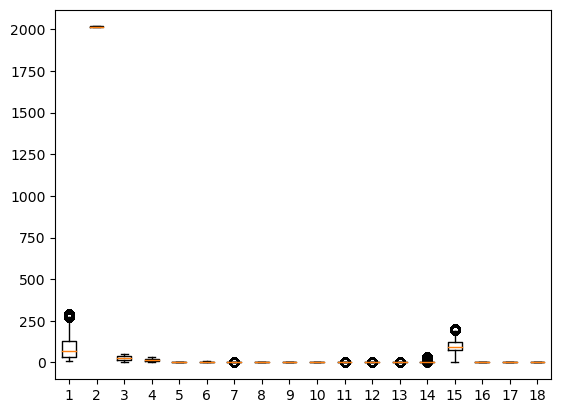

In [12]:
# Visualize the outliers
plt.boxplot(dataset[numerical_features])
plt.show()